In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
s = ctl.tf('s')
G = 10/(s+10)

w = 10

Gjw = 10/(1j*w+10)
print('\tresposta na frequencia', w, 'rad/s', Gjw)
print('\tganho', abs(Gjw), ' ou ', 20*np.log10(abs(Gjw)), 'dB')
print('\tdeslocamento de fase', np.angle(Gjw),'rad ou', np.angle(Gjw)*180/np.pi)

	resposta na frequencia 10 rad/s (0.5-0.5j)
	ganho 0.7071067811865476  ou  -3.0102999566398116 dB
	deslocamento de fase -0.7853981633974483 rad ou -45.0


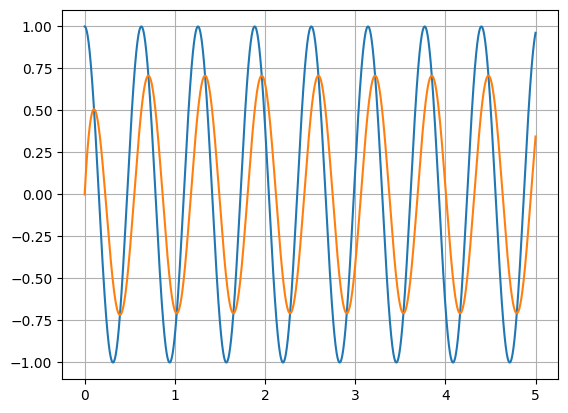

In [ ]:
#confirmando as previsoes acima

t = np.arange(0, 5, 0.001)
sinal = np.cos(w*t)
tout, resp = ctl.forced_response(G, t, sinal)
plt.figure(1)
plt.clf()
plt.plot(t,sinal, t , resp)
plt.grid(True)
plt.show()

para encontrar o atraso, basta medir o tempo entre piocs, e fazer a regra de 3

In [ ]:
amplitude = np.max(resp)

print('medidas: ')
print('amplitude do sinal de resposta: ', amplitude)

tpicoSinal = 3.142
tpicoResp = 3.220

df = 360*(tpicoResp-tpicoSinal)*10/(2*np.pi) #este 10 eh a frequencia em rad/s
print(df)

medidas: 
amplitude do sinal de resposta:  0.7071002682098798
44.690708020204376


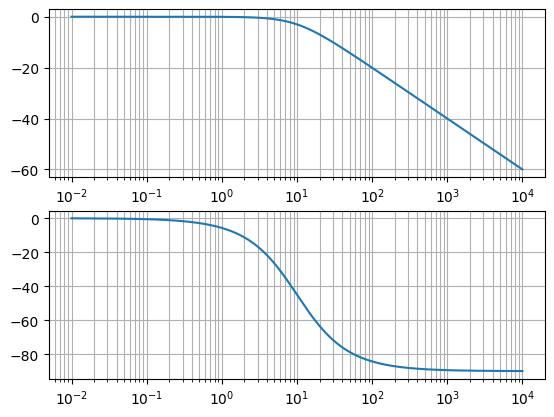

In [ ]:
w = np.arange(0.01, 10e3, 0.01)

Gjw = 10/(1j*w+10)

plt.figure(2)
plt.clf()

#plot do ganho
plt.subplot(211)
plt.semilogx(w, 20*np.log10(abs(Gjw))) #plota em logx
plt.grid(True, which='both')

#plot da fase
plt.subplot(212)
plt.semilogx(w, np.angle(Gjw)*180/np.pi) #plota em logx
plt.grid(True, which = 'both')

plt.show()

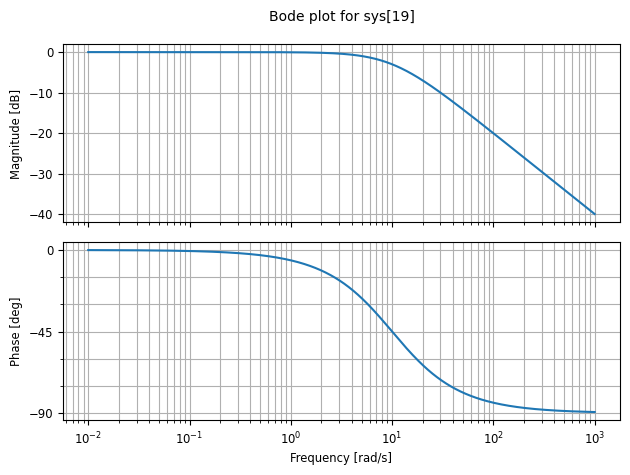

In [ ]:
#diagrama de bode em funcao da control

w = np.logspace(-2, 3, 1000)
plt.figure(3)
plt.clf()
ctl.bode(G, dB=True, omega = w)
plt.show()

In [ ]:
#sistemas discretos

Ts = 0.001
z = ctl.tf('z')
z.dt = Ts
Gz = 0.00995/(z-0.99)

w = 5
Gzejw = 0.00995/(np.exp(1j*w*Ts)-0.99)

print('\tresposta na frequencia', w, 'rad/s', Gzejw)
print('\tganho', abs(Gzejw), ' ou ', 20*np.log10(abs(Gzejw)), 'dB')
print('\tdeslocamento de fase', np.angle(Gzejw),'rad ou', np.angle(Gzejw)*180/np.pi)

	resposta na frequencia 5 rad/s (0.7965985277249836-0.39879609836873015j)
	ganho 0.8908465313665049  ou  -1.0039421329860472 dB
	deslocamento de fase -0.4641464404993746 rad ou -26.593632116634147


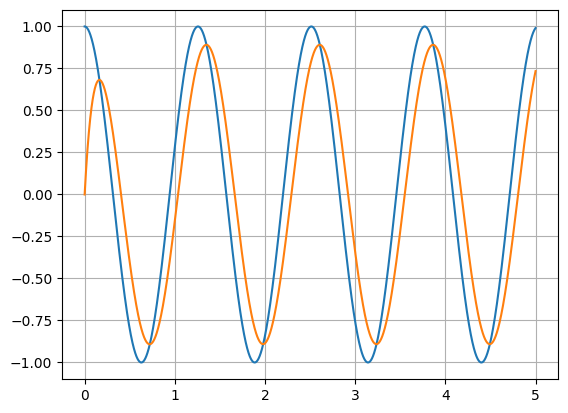

In [ ]:
#confirmando as previsoes acima

t = np.arange(0, 5, 0.001)
sinal = np.cos(w*t)
tout, resp = ctl.forced_response(Gz, t, sinal)
plt.figure(4)
plt.clf()
plt.plot(t,sinal, t , resp)
plt.grid(True)
plt.show()

In [ ]:
amplitude = np.max(resp)

print('medidas: ')
print('amplitude do sinal de resposta: ', amplitude)

tpicoSinal = 3.769
tpicoResp = 3.862

df = 360*(tpicoResp-tpicoSinal)*5/(2*np.pi) #este 10 eh a frequencia em rad/s
print(df)

medidas: 
amplitude do sinal de resposta:  0.8908464122811389
26.64253747358327


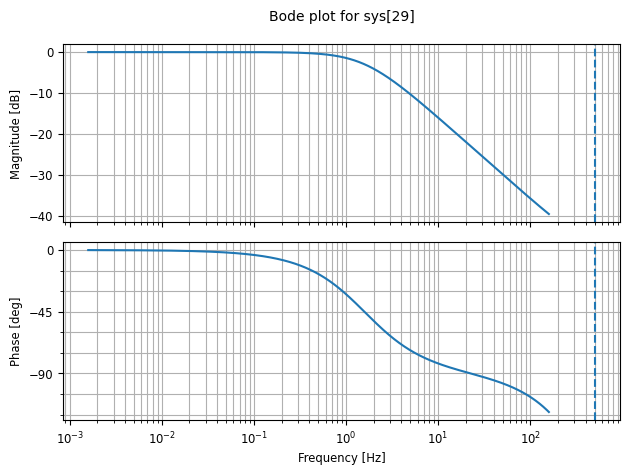

In [ ]:
w = np.logspace(-2, 3, 1000)
plt.figure(6)
plt.clf()
ctl.bode(Gz, dB=True, Hz = True, omega = w)
plt.show()

ATIVIDADE DA AULA

<TransferFunction>: sys[1063]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5769 z^3 - 1.731 z^2 + 1.731 z - 0.5769
-----------------------------------------
   z^3 - 2.068 z^2 + 1.415 z - 0.3193

dt = 0.0001



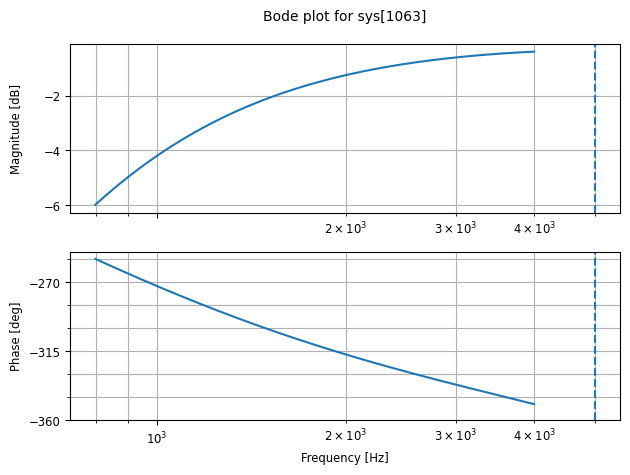

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

fs = 10000
Ts = 1/fs
z = ctl.tf('z')
Mz = (0.5769*z*z*z - 1.731*z*z + 1.731*z - 0.5769)/(z*z*z - 2.068*z*z + 1.415*z - 0.3193)
print(Mz)



#plt.figure(7)
#plt.clf()
#plt.plot()
#plt.show()

w = np.logspace(3.7, 4.4, 1000)
plt.figure(7)
plt.clf()
ctl.bode(Mz, dB=True, Hz = True, omega = w)
plt.show()



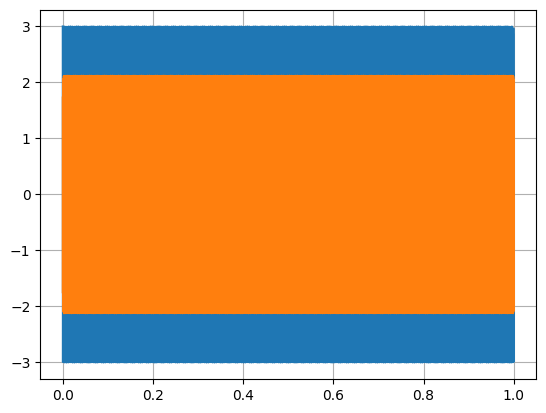

2.1206872528079757


In [ ]:

t = np.arange(0, 1, 0.0001)
w = 2*1221*np.pi
sinal = 3*np.cos(w*t)
tout, resp = ctl.forced_response(Hz, t, sinal)


plt.figure(8)
plt.clf()
plt.plot(t,sinal, t , resp)
plt.grid(True)
plt.show()

amplitude = np.max(resp[500:1000])
print(amplitude)

In [ ]:
aux = np.exp(1j*w*Ts)
Mzejw = (0.5769*aux*aux*aux - 1.731*aux*aux + 1.731*aux - 0.5769)/(aux*aux*aux - 2.068*aux*aux + 1.415*aux - 0.3193)

print('\tresposta na frequencia', w, 'rad/s', Mzejw)
print('\tganho', abs(Mzejw), ' ou ', 20*np.log10(abs(Mzejw)), 'dB')
print('\tdeslocamento de fase', np.angle(Mzejw),'rad ou', np.angle(Mzejw)*180/np.pi)

	resposta na frequencia 779.1149780902687 rad/s (-0.006079320301722086-0.007874180774490046j)
	ganho 0.009947907227164866  ou  -40.045365471094385 dB
	deslocamento de fase -2.2282654282366425 rad ou -127.67020467287064


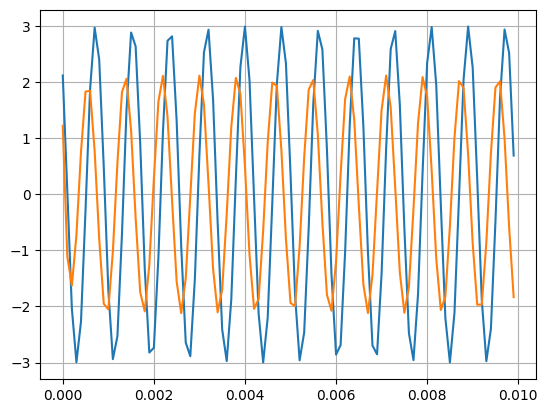

In [ ]:
t = np.arange(0, 0.01, 0.0001)
w = 2*1221*np.pi
sinal = 3*np.cos(w*t+np.pi/4)
tout, resp = ctl.forced_response(Hz, t, sinal)
plt.figure(4)
plt.clf()
plt.plot(t,sinal, t , resp)
plt.grid(True)
plt.show()


#(0.20408063370051904+0.6768009591559132j)

In [ ]:
print('\tresposta na frequencia', w, 'rad/s', Mzejw)
print('\tganho', abs(Mzejw), ' ou ', 20*np.log10(abs(Mzejw)), 'dB')
print('\tdeslocamento de fase', np.angle(Mzejw),'rad ou', np.angle(Mzejw)*180/np.pi)

amp = 3* abs(Mzejw)
print(amp)

	resposta na frequencia 7671.769260066275 rad/s (0.20408063370051904+0.6768009591559132j)
	ganho 0.7069005894508573  ou  -3.0128331240198 dB
	deslocamento de fase 1.277929898423523 rad ou 73.21998969324987
2.120701768352572


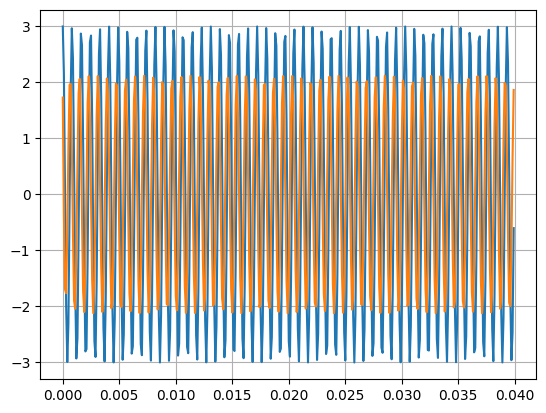

In [ ]:
fs = 10000
Ts = 1/fs
z = ctl.tf('z')
Mz = (0.5769*z*z*z - 1.731*z*z + 1.731*z - 0.5769)/(z*z*z - 2.068*z*z + 1.415*z - 0.3193)

t = np.arange(0, 0.04, 0.0001)
w = 2*1221*np.pi
sinal = 3*np.cos(w*t)
tout, resp = ctl.forced_response(Hz, t, sinal)

plt.figure(4)
plt.clf()
plt.plot(t,sinal, t , resp)
plt.grid(True)
plt.show()